c:\Users\DanielChenJH\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.


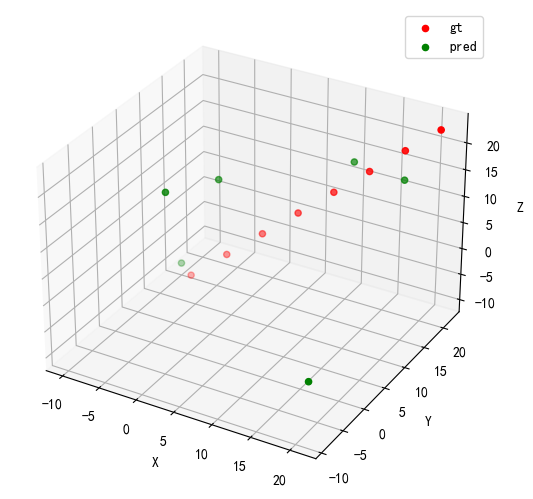

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
# import matplotlib;matplotlib.use('tkagg')

plt.rcParams['font.sans-serif']=['SimHei']  # 指定默认字体 SimHei为黑体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
# plt.figure(figsize=(200,200))  # 设置画布大小
# 数据１
data1 = np.arange(24).reshape((8, 3))
x1 = data1[:, 0]  # [ 0  3  6  9 12 15 18 21]
y1 = data1[:, 1]  # [ 1  4  7 10 13 16 19 22]
z1 = data1[:, 2]  # [ 2  5  8 11 14 17 20 23]

# 数据２
data2 = np.random.randint(-10, 23, (6, 3))
x2 = data2[:, 0]
y2 = data2[:, 1]
z2 = data2[:, 2]

# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, y1, z1, c='r', label='gt')
ax.scatter(x2, y2, z2, c='g', label='pred')

# 绘制图例
ax.legend(loc='best')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 10, 'color': 'black'})
ax.set_ylabel('Y', fontdict={'size': 10, 'color': 'black'})
ax.set_xlabel('X', fontdict={'size': 10, 'color': 'black'})

# 展示
plt.savefig('1.jpg', bbox_inches='tight', dpi=120)
plt.show()

In [2]:
import numpy as np

a=np.array([1,2])
a=a[None,:]
a
b=np.array([3,4])
b=b[None,:]
c=np.concatenate((a,b),axis=0)
c

array([[1, 2],
       [3, 4]])

In [3]:
a=np.load('best_iou.npy', allow_pickle='TRUE').item()
a
len(a)

552

In [4]:
a

{0: [array([-0.5104925 , -0.7014818 ,  2.2122576 ,  0.17295104,  0.78622437,
          0.20043874], dtype=float32),
  array([ 0.78622663,  0.02392763,  2.1393719 ,  0.01512417, -1.4365127 ,
          2.648888  ], dtype=float32),
  array([-0.33754146,  0.08474255,  2.011819  , -0.68344355, -1.4877062 ,
          2.4126964 ], dtype=float32)],
 0.802: [array([-1.5387934 , -1.131681  ,  2.7719986 ,  0.32665694,  0.67239976,
          0.36153793], dtype=float32),
  array([-1.2479426 , -0.43682897,  2.360242  , -1.8633925 , -1.793585  ,
          3.0811906 ], dtype=float32),
  array([-1.2121365, -0.4592812,  2.4104607, -1.8654504, -1.8040807,
          3.1335366], dtype=float32)],
 0.669: [array([ 0.01483256, -0.79445964,  2.9323525 ,  0.5876497 ,  0.7056239 ,
          0.40077925], dtype=float32),
  array([ 0.5426164 , -0.02109504,  2.418405  , -0.45301753, -1.4624779 ,
          3.3975778 ], dtype=float32),
  array([ 0.60248226, -0.08883572,  2.5315733 , -0.57281715, -1.5000836 ,
         

In [16]:
IOU=0.875
gt_bbox,pred,gt=a[IOU]
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
# import matplotlib;matplotlib.use('tkagg')
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
plt.switch_backend('agg')
# 绘制散点图
fig = plt.figure()
ax = fig.add_axes(Axes3D(fig)) 
# ax = Axes3D(fig)
kwargs={0:{'linewidth':1, 'color':'red', 'linestyle':'--'}, 1:{'linewidth':1, 'color':'green', 'linestyle':'--',}, 2:{'linewidth':1, 'color':'blue', 'linestyle':'-'}}
#             body_list = ["Head","Neck","SpineShoulder","SpineMid","SpineBase","ShoulderRight","ElbowRight","WristRight",
#        "ShoulderLeft","ElbowLeft","WristLeft","HipRight","KneeRight","AnkleRight","HipLeft","KneeLeft","AnkleLeft"]
# 画人的真值姿态
figname=''

for key,value in np.load('point_to_box.npy', allow_pickle='TRUE').item().items():
    if (value[1]==gt_bbox).all():
        body_list=value[0][:]
        temp=np.concatenate((body_list[0][None,:], body_list[1][None,:], body_list[2][None,:],body_list[3][None,:],body_list[4][None,:],body_list[11][None,:],body_list[12][None,:],body_list[13][None,:]), axis=0)
        ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])
        
        temp=np.concatenate((body_list[4][None,:],body_list[14][None,:],body_list[15][None,:],body_list[16][None,:]), axis=0)
        ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])   
                        
        temp=body_list[0]
        temp=np.concatenate((body_list[7][None,:], body_list[6][None,:],body_list[5][None,:],body_list[2][None,:],body_list[8][None,:],body_list[9][None,:],body_list[10][None,:]), axis=0)
        ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])
        figpath=key.split('.')[0]+'.jpg'       

# 画两个整体框
any={0:pred,1:gt}
label_map={0:'Prediction with IOU: '+str(IOU),1:'GT'}
for i in range(2):
    x=any[i][0]
    y=any[i][1]
    z=any[i][5]
    dx=any[i][3]-any[i][0]
    dy=any[i][4]-any[i][1]
    dz=any[i][2]-any[i][5]
    
    xx = [x, x+dx, x+dx, x, x]
    yy = [y+dy, y+dy, y, y, y+dy]
    ax.plot3D(xx, yy, [z+dz]*5, **kwargs[i])
    ax.plot3D(xx[:3], yy[:3], [z]*3, **kwargs[i])
    ax.plot3D(xx[2:], yy[2:], [z]*3, **kwargs[i])
    for n in range(3):
        ax.plot3D([xx[n], xx[n]], [yy[n], yy[n]], [z, z+dz], **kwargs[i])
    ax.plot3D([xx[3], xx[3]], [yy[3], yy[3]], [z, z+dz], label=label_map[i], **kwargs[i])

# 绘制图例
ax.legend(loc='lower right')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 10, 'color': 'black'})
ax.set_ylabel('Y', fontdict={'size': 10, 'color': 'black'})
ax.set_xlabel('X', fontdict={'size': 10, 'color': 'black'})
ax.view_init(elev=-70, azim=90)
plt.savefig('1.jpg')

c:\Users\DanielChenJH\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  # This is added back by InteractiveShellApp.init_path()


In [6]:
a=np.load('best_iou.npy', allow_pickle='TRUE').item()
a[0.862]

[array([ 1.0242078 , -0.8952348 ,  4.3281736 ,  0.36368853,  0.4410455 ,
         0.5700338 ], dtype=float32),
 array([ 1.3897072 , -0.4685517 ,  3.7374687 ,  0.69149005, -1.3580062 ,
         4.8459806 ], dtype=float32),
 array([ 1.3878963 , -0.45418933,  3.7581398 ,  0.6605193 , -1.3362803 ,
         4.8982077 ], dtype=float32)]

In [13]:
# if IOU>max(self.best_iou.keys()):       # 只有IOU有增加时画图
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
IOU=0.875
gt_bbox,pred,gt=a=np.load('best_iou.npy', allow_pickle='TRUE').item()[IOU]
if 1:        
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
    import matplotlib;matplotlib.use('tkagg')
    plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号
    # plt.switch_backend('agg')

    # 绘制散点图
    fig = plt.figure(dpi=200)
    ax = fig.add_axes(Axes3D(fig)) 
    # ax = Axes3D(fig)
    kwargs={0:{'linewidth':1, 'color':'red', 'linestyle':'--'}, 1:{'linewidth':1, 'color':'green', 'linestyle':'--',}, 2:{'linewidth':1, 'color':'blue', 'linestyle':'-'}}
    # body_list = ["Head","Neck","SpineShoulder","SpineMid","SpineBase","ShoulderRight","ElbowRight","WristRight",
    #              "ShoulderLeft","ElbowLeft","WristLeft","HipRight","KneeRight","AnkleRight","HipLeft","KneeLeft","AnkleLeft"]
    # 画人的真实姿态
    point_to_box = np.load('point_to_box.npy', allow_pickle='TRUE').item()
    for key,value in point_to_box.items():
        a=value[1]
        if (value[1]==gt_bbox[:6]).all():
            body_list=value[0][:]
            temp=np.concatenate((body_list[0][None,:], body_list[1][None,:], body_list[2][None,:],body_list[3][None,:],body_list[4][None,:],body_list[11][None,:],body_list[12][None,:],body_list[13][None,:]), axis=0)
            ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])
            
            temp=np.concatenate((body_list[4][None,:],body_list[14][None,:],body_list[15][None,:],body_list[16][None,:]), axis=0)
            ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])   
                        
            temp=body_list[0]
            temp=np.concatenate((body_list[7][None,:], body_list[6][None,:],body_list[5][None,:],body_list[2][None,:],body_list[8][None,:],body_list[9][None,:],body_list[10][None,:]), axis=0)
            ax.plot3D(temp[:,0], temp[:,1], temp[:,2], **kwargs[2])    
            break
    # 画两个整体框
    any={0:pred,1:gt}
    label_map={0:'Prediction with IOU: '+str(IOU),1:'GT'}
    for i in range(2):
        x=any[i][0]
        y=any[i][1]
        z=any[i][5]
        dx=any[i][3]-any[i][0]
        dy=any[i][4]-any[i][1]
        dz=any[i][2]-any[i][5]
        
        xx = [x, x+dx, x+dx, x, x]
        yy = [y+dy, y+dy, y, y, y+dy]
        ax.plot3D(xx, yy, [z+dz]*5, **kwargs[i])
        ax.plot3D(xx[:3], yy[:3], [z]*3, **kwargs[i])
        ax.plot3D(xx[2:], yy[2:], [z]*3, **kwargs[i])
        for n in range(3):
            ax.plot3D([xx[n], xx[n]], [yy[n], yy[n]], [z, z+dz], **kwargs[i])
        ax.plot3D([xx[3], xx[3]], [yy[3], yy[3]], [z, z+dz], label=label_map[i], **kwargs[i])
        # 画中心点区别图
        if not i:
            # 预测框中心点
            tmp=np.array((x+0.5*dx,y+0.5*dy,z+0.5*dz))
            # ax.scatter3D(x+0.5*dx,y+0.5*dy,z+0.5*dz,s=10,color='gray')
            # 画倾角预测情况
            r=0.35
            # ax.quiver(x+0.5*dx,y+0.5*dy,z+0.5*dz,r*math.cos(obli),r*math.sin(obli),0,**{'linewidth':1, 'color':'red', 'linestyle':'--'})
        else:
            loca=np.concatenate((tmp[None,:], np.array((x+0.5*dx,y+0.5*dy,z+0.5*dz))[None,:]), axis=0)
            ax.plot3D(loca[:,0],loca[:,1],loca[:,2],color='gray',linewidth=0.7,linestyle='--')
            ax.scatter3D(x+0.5*dx,y+0.5*dy,z+0.5*dz,s=10,color='green') 
            ax.scatter3D(tmp[0],tmp[1],tmp[2],s=10,color='gray',label='SpineBase Error: '\
                            +str(round(float(np.linalg.norm(tmp-np.array((body_list[4][0],body_list[4][1],body_list[4][2])))),3))+'m')

            
    ax.legend(loc='lower right')
    ax.set_zlabel('Z', fontdict={'size': 10, 'color': 'black'})
    ax.set_ylabel('Y', fontdict={'size': 10, 'color': 'black'})
    ax.set_xlabel('X', fontdict={'size': 10, 'color': 'black'})

    # 固定视角作图
    ax.view_init(elev=-70, azim=90)
    plt.savefig('1.jpg', bbox_inches='tight', dpi=300)
    ax.view_init(elev=-135, azim=45)
    plt.savefig('2.jpg', bbox_inches='tight', dpi=300)
    ax.view_init(elev=-45, azim=135)
    plt.savefig('3.jpg', bbox_inches='tight', dpi=300)
    plt.show()
    # plt.close()

c:\Users\DanielChenJH\.conda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


[0.26100203 0.05278899 0.11089402 ... 0.02656612 0.04659679 0.02542985]


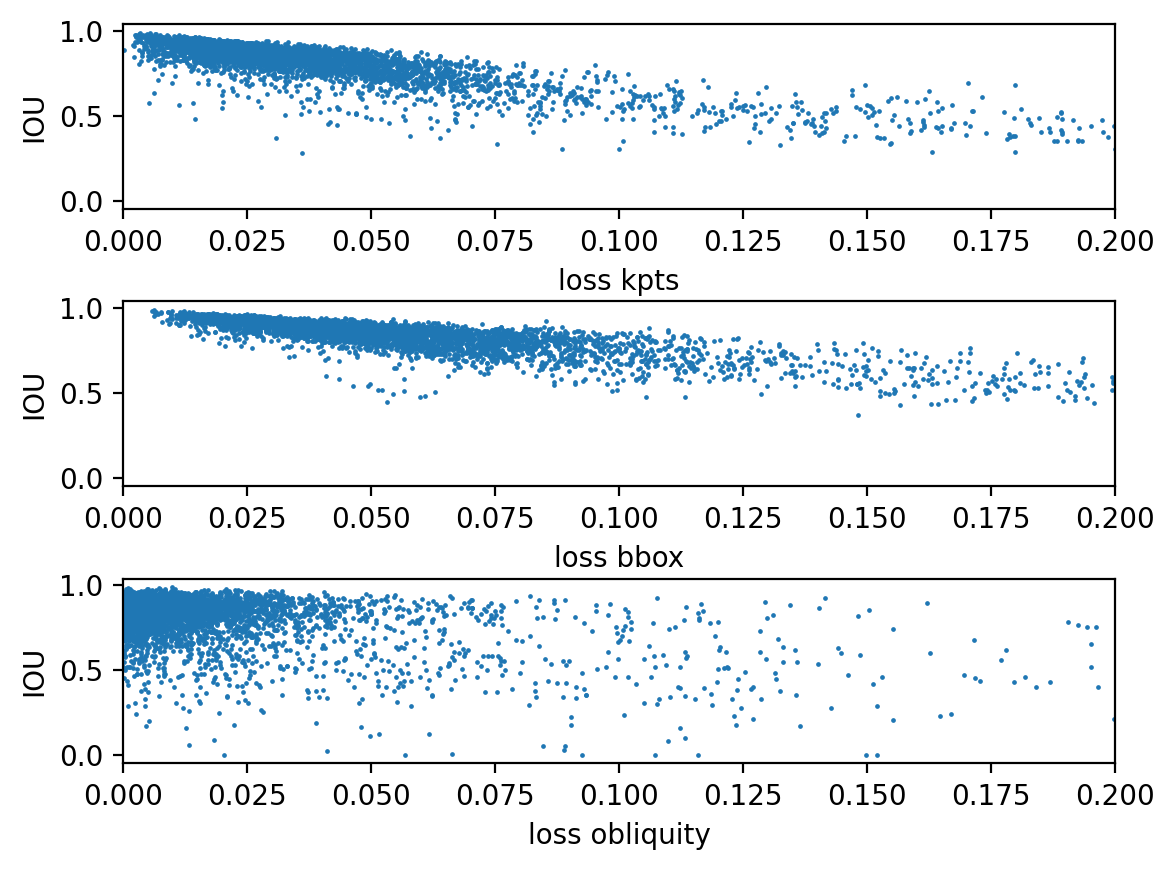

In [22]:
import numpy as np
import matplotlib.pyplot as plt
data=np.load('checklist.npy', allow_pickle='TRUE')
print(data[:,1])
fig=plt.figure(dpi=200)
plt.subplot(311)
plt.scatter(data[:,1],data[:,0],s=0.5)
plt.xlim([0.0,0.2])
plt.xlabel('loss kpts')
plt.ylabel('IOU')
plt.subplot(312)
plt.scatter(data[:,2],data[:,0],s=0.5)
plt.xlim([0.0,0.2])
plt.xlabel('loss bbox')
plt.ylabel('IOU')
plt.subplot(313)
plt.scatter(data[:,3],data[:,0],s=0.5)
plt.xlim([0.0,0.2])
plt.ylabel('IOU')
plt.xlabel('loss obliquity')
fig.subplots_adjust(hspace=0.5) 
plt.savefig('loss与IOU关系.jpg',dpi=300,bbox_inches='tight')
plt.show()